# Wearable Stress Detection Device

## Data Set

SCL stands for Skin Conductance Level, which refers to the electrical conductance level of the skin. Skin conductance can increase or decrease in response to different stimuli, including emotions and stressful events. Measurement of skin conductance is often used in research on emotional response and autonomic reactivity.

RMSSD stands for "Root Mean Square of Successive Differences", which refers to the root mean square of the mean of the squared differences between successive RR intervals on the electrocardiogram (ECG). RMSSD is a measure of heart rate variability (HRV), which refers to fluctuations in the time intervals between successive heartbeats. RMSSD is often used as an index of parasympathetic nervous system activity, which has an inhibitory effect on heart rate.

HR stands for "Heart Rate", which refers to heart rate, i.e. the number of heart beats per minute. Heart rate is commonly measured using an electrocardiograph (ECG), a heart rate monitor or simply by counting pulse beats at the wrist or neck. Heart rate can vary in response to different stimuli, including physical activity, stress and emotions.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd

# Cargamos el archivo Excel con todas sus hojas
archivo_excel = pd.ExcelFile("hrv stress labels.xlsx")

# Inicializamos un DataFrame vacío
df_final = pd.DataFrame()

# Iteramos por cada hoja del archivo Excel
for hoja in archivo_excel.sheet_names:
    # Cargamos la hoja en un DataFrame temporal
    df_temporal = pd.read_excel(archivo_excel, hoja)
    # Añadimos el DataFrame temporal al final del DataFrame final
    df_final = df_final.append(df_temporal)


In [33]:
df_final

,Unnamed: 0,PP,C,timestamp,HR,RMSSD,SCL,date,subject,label,Condition,ElapsedTime
0,0,PP1,1,20120918T131600000,NaN,NaN,80.239727,2012-09-18 13:16:00,p1,rest,R,0
1,1,PP1,1,20120918T131700000,61.0,0.061420,77.365127,2012-09-18 13:17:00,p1,rest,R,1
2,2,PP1,1,20120918T131800000,64.0,0.049663,77.359559,2012-09-18 13:18:00,p1,rest,R,2
3,3,PP1,1,20120918T131900000,60.0,0.052487,76.728772,2012-09-18 13:19:00,p1,rest,R,3
4,4,PP1,1,20120918T132000000,61.0,0.051189,76.512877,2012-09-18 13:20:00,p1,rest,R,4
...,...,...,...,...,...,...,...,...,...,...,...,...
123,3135,PP25,3,20121107T161500000,NaN,NaN,NaN,2012-11-07 16:15:00,p25,time pressure,T,170
124,3136,PP25,3,20121107T161600000,NaN,NaN,NaN,2012-11-07 16:16:00,p25,time pressure,T,171
125,3137,PP25,3,20121107T161700000,NaN,NaN,NaN,2012-11-07 16:17:00,p25,time pressure,T,172
126,3138,PP25,3,20121107T161800000,NaN,NaN,NaN,2012-11-07 16:18:00,p25,time pressure,T,173


In [34]:
df_final = df_final.reset_index()

In [35]:
df_final

,index,Unnamed: 0,PP,C,timestamp,HR,RMSSD,SCL,date,subject,label,Condition,ElapsedTime
0,0,0,PP1,1,20120918T131600000,NaN,NaN,80.239727,2012-09-18 13:16:00,p1,rest,R,0
1,1,1,PP1,1,20120918T131700000,61.0,0.061420,77.365127,2012-09-18 13:17:00,p1,rest,R,1
2,2,2,PP1,1,20120918T131800000,64.0,0.049663,77.359559,2012-09-18 13:18:00,p1,rest,R,2
3,3,3,PP1,1,20120918T131900000,60.0,0.052487,76.728772,2012-09-18 13:19:00,p1,rest,R,3
4,4,4,PP1,1,20120918T132000000,61.0,0.051189,76.512877,2012-09-18 13:20:00,p1,rest,R,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,123,3135,PP25,3,20121107T161500000,NaN,NaN,NaN,2012-11-07 16:15:00,p25,time pressure,T,170
3136,124,3136,PP25,3,20121107T161600000,NaN,NaN,NaN,2012-11-07 16:16:00,p25,time pressure,T,171
3137,125,3137,PP25,3,20121107T161700000,NaN,NaN,NaN,2012-11-07 16:17:00,p25,time pressure,T,172
3138,126,3138,PP25,3,20121107T161800000,NaN,NaN,NaN,2012-11-07 16:18:00,p25,time pressure,T,173


# Normalise data

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto escalador MinMax
scaler = MinMaxScaler()

# Escalar las columnas HR, RMSSD y SCL
df_final[['HR', 'RMSSD', 'SCL']] = scaler.fit_transform(df_final[['HR', 'RMSSD', 'SCL']])

In [37]:
df_final

,index,Unnamed: 0,PP,C,timestamp,HR,RMSSD,SCL,date,subject,label,Condition,ElapsedTime
0,0,0,PP1,1,20120918T131600000,NaN,NaN,0.019249,2012-09-18 13:16:00,p1,rest,R,0
1,1,1,PP1,1,20120918T131700000,0.08,0.148435,0.017199,2012-09-18 13:17:00,p1,rest,R,1
2,2,2,PP1,1,20120918T131800000,0.14,0.114096,0.017195,2012-09-18 13:18:00,p1,rest,R,2
3,3,3,PP1,1,20120918T131900000,0.06,0.122344,0.016745,2012-09-18 13:19:00,p1,rest,R,3
4,4,4,PP1,1,20120918T132000000,0.08,0.118553,0.016591,2012-09-18 13:20:00,p1,rest,R,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,123,3135,PP25,3,20121107T161500000,NaN,NaN,NaN,2012-11-07 16:15:00,p25,time pressure,T,170
3136,124,3136,PP25,3,20121107T161600000,NaN,NaN,NaN,2012-11-07 16:16:00,p25,time pressure,T,171
3137,125,3137,PP25,3,20121107T161700000,NaN,NaN,NaN,2012-11-07 16:17:00,p25,time pressure,T,172
3138,126,3138,PP25,3,20121107T161800000,NaN,NaN,NaN,2012-11-07 16:18:00,p25,time pressure,T,173


In [38]:
#number of rows per column 
df_final.count()

index          3140
Unnamed: 0     3140
PP             3140
C              3140
timestamp      3140
HR             1490
RMSSD          1490
SCL            2578
date           3140
subject        3140
label          3140
Condition      3140
ElapsedTime    3140
dtype: int64

In [39]:
df_final = df_final.dropna(subset=['SCL','HR','RMSSD'])

In [40]:
df_final.count()

index          1437
Unnamed: 0     1437
PP             1437
C              1437
timestamp      1437
HR             1437
RMSSD          1437
SCL            1437
date           1437
subject        1437
label          1437
Condition      1437
ElapsedTime    1437
dtype: int64

In [41]:
# crear el DataFrame
#df = pd.DataFrame({'texto': ['rest', 'no stress', 'time pressure', 'interruption']})

# crear el diccionario de correspondencias
diccionario = {'rest': 'no stress', 'no stress': 'no stress', 'time pressure': 'stress', 'interruption': 'stress'}
diccionario2 = {'rest': 0, 'no stress': 0, 'time pressure': 1, 'interruption': 1}

# crear la nueva columna
df_final['state'] = df_final['label'].map(diccionario)
# crear la nueva columna
df_final['numeros'] = df_final['label'].map(diccionario2)

In [42]:
df_final

,index,Unnamed: 0,PP,C,timestamp,HR,RMSSD,SCL,date,subject,label,Condition,ElapsedTime,state,numeros
1,1,1,PP1,1,20120918T131700000,0.08,0.148435,0.017199,2012-09-18 13:17:00,p1,rest,R,1,no stress,0
2,2,2,PP1,1,20120918T131800000,0.14,0.114096,0.017195,2012-09-18 13:18:00,p1,rest,R,2,no stress,0
3,3,3,PP1,1,20120918T131900000,0.06,0.122344,0.016745,2012-09-18 13:19:00,p1,rest,R,3,no stress,0
4,4,4,PP1,1,20120918T132000000,0.08,0.118553,0.016591,2012-09-18 13:20:00,p1,rest,R,4,no stress,0
5,5,5,PP1,1,20120918T132100000,0.16,0.077397,0.016848,2012-09-18 13:21:00,p1,rest,R,5,no stress,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,31,3043,PP25,1,20121107T140100000,0.80,0.011995,0.050200,2012-11-07 14:01:00,p25,no stress,N,36,no stress,0
3044,32,3044,PP25,1,20121107T140200000,0.76,0.009332,0.058991,2012-11-07 14:02:00,p25,no stress,N,37,no stress,0
3051,39,3051,PP25,1,20121107T140900000,0.68,0.096455,0.064875,2012-11-07 14:09:00,p25,no stress,N,44,no stress,0
3060,48,3060,PP25,2,20121107T143800000,0.52,0.064618,0.084826,2012-11-07 14:38:00,p25,rest,R,73,no stress,0


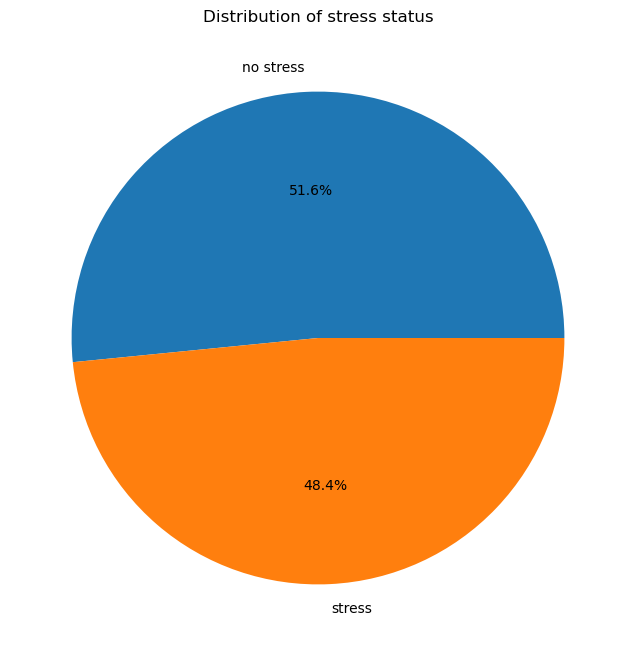

In [250]:
import matplotlib.pyplot as plt

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(df_final['state'].value_counts(), labels=df_final['state'].unique(), autopct='%1.1f%%')

# Agregar título
plt.title('Distribution of stress status')

# Mostrar el gráfico de torta
plt.show()

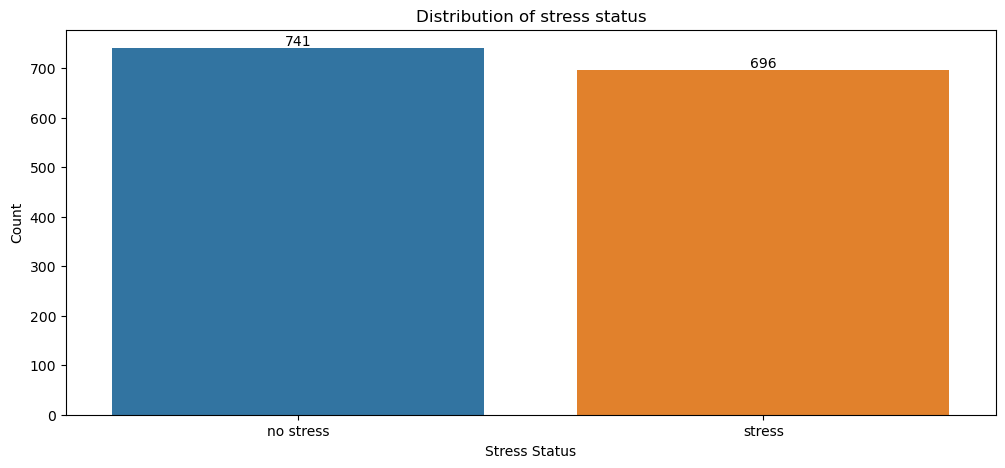

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los valores y etiquetas para el gráfico de barras
values = df_final['state'].value_counts()
labels = df_final['state'].unique()

# Definir una paleta de colores
#colors = sns.color_palette('Set3', len(labels))

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=labels, y=values)

# Agregar etiquetas a las barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Agregar título y etiquetas de los ejes
plt.title('Distribution of stress status')
plt.xlabel('Stress Status')
plt.ylabel('Count')

# Mostrar el gráfico de barras
plt.show()

In [44]:
#df_sin_duplicados = df_sin_na.drop_duplicates(subset='HR')

<AxesSubplot:xlabel='SCL', ylabel='Count'>

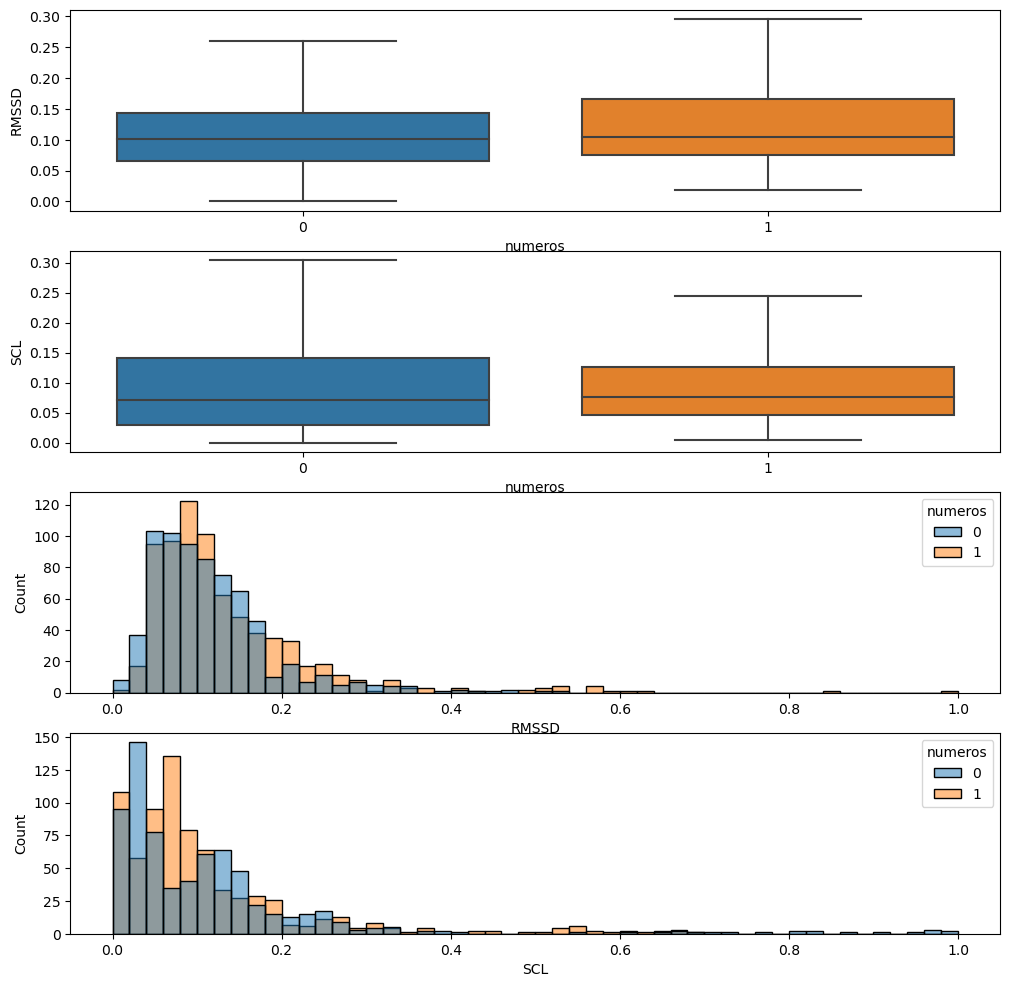

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(nrows=4, figsize=(12,12))
#sns.boxplot(x="numeros", y="HR", data=df_final,showfliers=False,ax=axs[0])
sns.boxplot(x="numeros", y="RMSSD", data=df_final,showfliers=False,ax=axs[0])
sns.boxplot(x="numeros", y="SCL", data=df_final,showfliers=False,ax=axs[1])
sns.histplot(df_final, x="RMSSD",bins=50,hue='numeros',ax=axs[2]) 
#sns.histplot(df_final, x="HR",bins=50,hue='numeros',ax=axs[4]) 
sns.histplot(df_final, x="SCL",bins=50,hue='numeros',ax=axs[3]) 


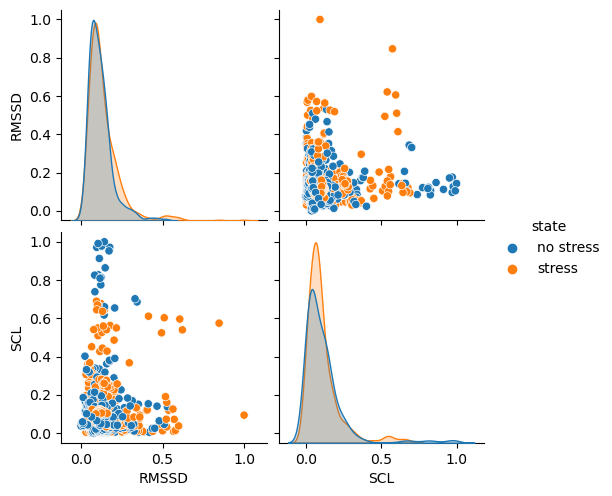

In [82]:
sns.pairplot(df_final[['RMSSD','SCL','state']], hue='state')

Text(0.5, 1.0, 'Skin Conductancce vs Heart Rate Variation')

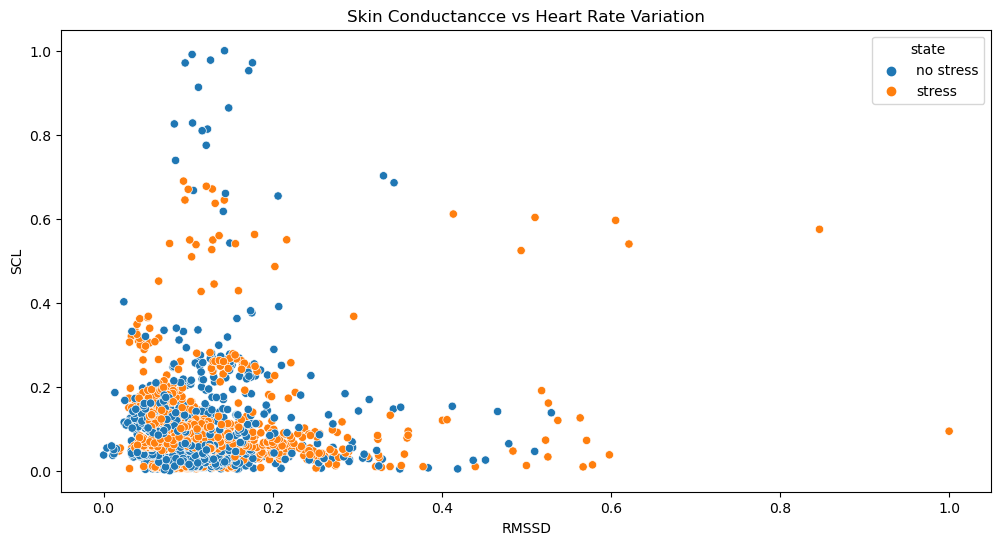

In [228]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Tamaño de la figura: 8 pulgadas de ancho, 6 pulgadas de alto


sns.scatterplot(x='RMSSD', y='SCL', hue='state', data=df_final)

plt.title('Skin Conductancce vs Heart Rate Variation')

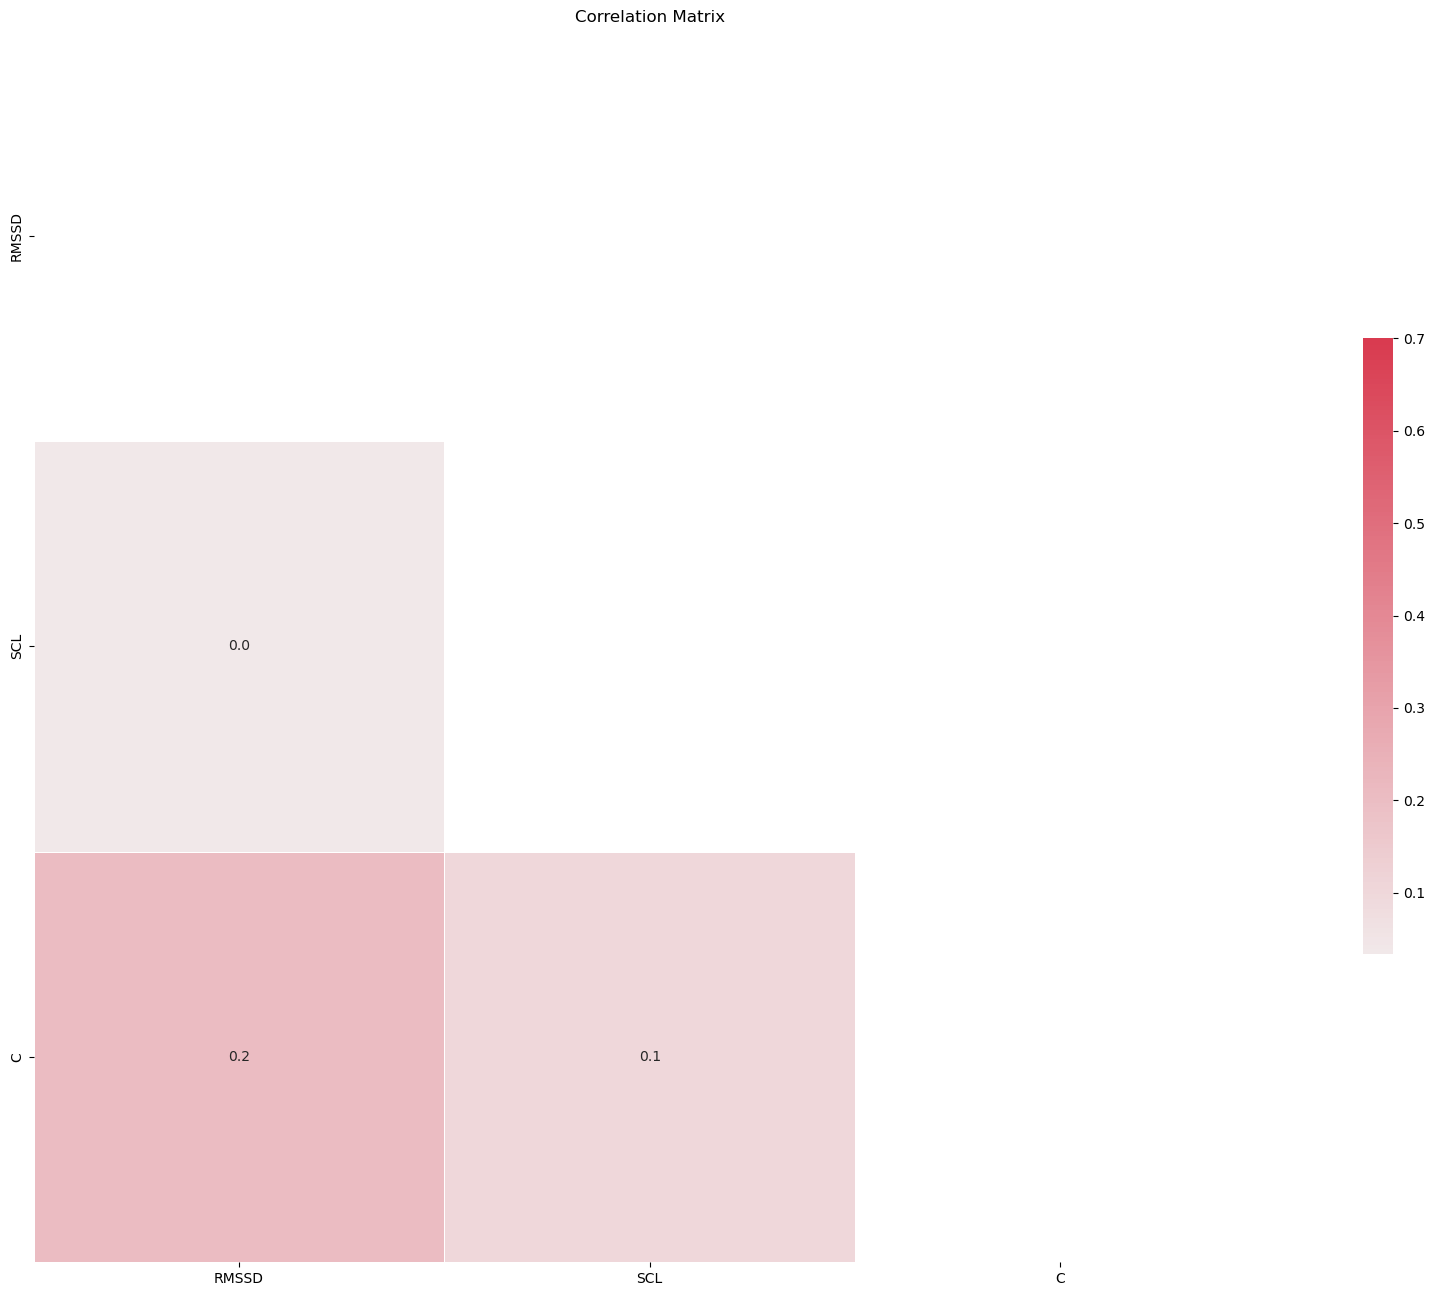

In [180]:
import numpy as np

corr=df_final[['RMSSD','SCL','C']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 8, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, fmt='.1f')
#sns.set(font_scale=1.5)
plt.title("Correlation Matrix")
plt.show()

In [181]:
#we use the get_dummies method of pandas to convert categorical variables into dummy/indicator variables. 

features = pd.get_dummies(df_final)

In [182]:
features

,index,Unnamed: 0,C,HR,RMSSD,SCL,date,ElapsedTime,numeros,PP_PP1,...,label_interruption,label_no stress,label_rest,label_time pressure,Condition_I,Condition_N,Condition_R,Condition_T,state_no stress,state_stress
1,1,1,1,0.08,0.148435,0.017199,2012-09-18 13:17:00,1,0,1,...,0,0,1,0,0,0,1,0,1,0
2,2,2,1,0.14,0.114096,0.017195,2012-09-18 13:18:00,2,0,1,...,0,0,1,0,0,0,1,0,1,0
3,3,3,1,0.06,0.122344,0.016745,2012-09-18 13:19:00,3,0,1,...,0,0,1,0,0,0,1,0,1,0
4,4,4,1,0.08,0.118553,0.016591,2012-09-18 13:20:00,4,0,1,...,0,0,1,0,0,0,1,0,1,0
5,5,5,1,0.16,0.077397,0.016848,2012-09-18 13:21:00,5,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,31,3043,1,0.80,0.011995,0.050200,2012-11-07 14:01:00,36,0,0,...,0,1,0,0,0,1,0,0,1,0
3044,32,3044,1,0.76,0.009332,0.058991,2012-11-07 14:02:00,37,0,0,...,0,1,0,0,0,1,0,0,1,0
3051,39,3051,1,0.68,0.096455,0.064875,2012-11-07 14:09:00,44,0,0,...,0,1,0,0,0,1,0,0,1,0
3060,48,3060,2,0.52,0.064618,0.084826,2012-11-07 14:38:00,73,0,0,...,0,0,1,0,0,0,1,0,1,0


In [183]:
activityIDdict = {0: 'no stress', 1:'stress'}

#protocol_acts = [1,2,3,4,5,6,7,17,16,24,12,13]

In [184]:
def plot_confusion_matrix(model,X_test,y_test,title='',is_ml=False, labels={}):
    
  ticks = list(map(lambda x : activityIDdict[x], np.unique(y_test).tolist())) if labels=={} else labels.values()
  preds = model.predict(X_test)
  pred_cat = preds if is_ml else np.argmax(preds,axis=1)
  print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(y_test,pred_cat)*100))
  plt.figure(figsize=(15,8),dpi=120)
  sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Blues',annot=True, fmt='d',xticklabels=ticks,yticklabels=ticks)
  plt.xlabel('Prediction')
  plt.ylabel('True label')
  plt.title(title)
  plt.show()

In [197]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold #Importamos la libreria KFold para implementar la validación cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import v_measure_score
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from numpy import mean
from numpy import std
from sklearn import tree

In [198]:
#Using a seed to facilitate replication of results
dev_data_df = df_final.sample(frac=0.7, random_state=1)
test_data_df = df_final.drop(dev_data_df.index)

In [199]:
features_used = ['SCL','RMSSD','numeros']

train_dt = dev_data_df.loc[:,features_used]
test_dt =  test_data_df.loc[:, features_used]


# getting X,y values for train and test set

X_train_dt = train_dt.drop('numeros', axis=1).values
y_train_dt = train_dt['numeros'].values

X_test_dt = test_dt.drop('numeros', axis=1).values
y_test_dt = test_dt['numeros'].values

# DecisionTreeClassifier

In [200]:
tclf = tree.DecisionTreeClassifier()

In [201]:
tclf = DecisionTreeClassifier()
tclf.fit(X_train_dt,y_train_dt)

y_pred_tclf = tclf.predict(X_test_dt)

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tclf_accuracy = accuracy_score(y_test_dt, y_pred_tclf)
tclf_precision = precision_score(y_test_dt, y_pred_tclf, average='weighted')
tclf_recall = recall_score(y_test_dt, y_pred_tclf, average='weighted')
tclf_f1 = f1_score(y_test_dt, y_pred_tclf, average='weighted')

# Displays the results
print("Accuracy: {:.3f}".format(tclf_accuracy))
print("Precision: {:.3f}".format(tclf_precision))
print("Recall: {:.3f}".format(tclf_recall))
print("F1-score: {:.3f}".format(tclf_f1))

Accuracy: 0.668
Precision: 0.668
Recall: 0.668
F1-score: 0.668


model accuracy on test set is: 66.82%


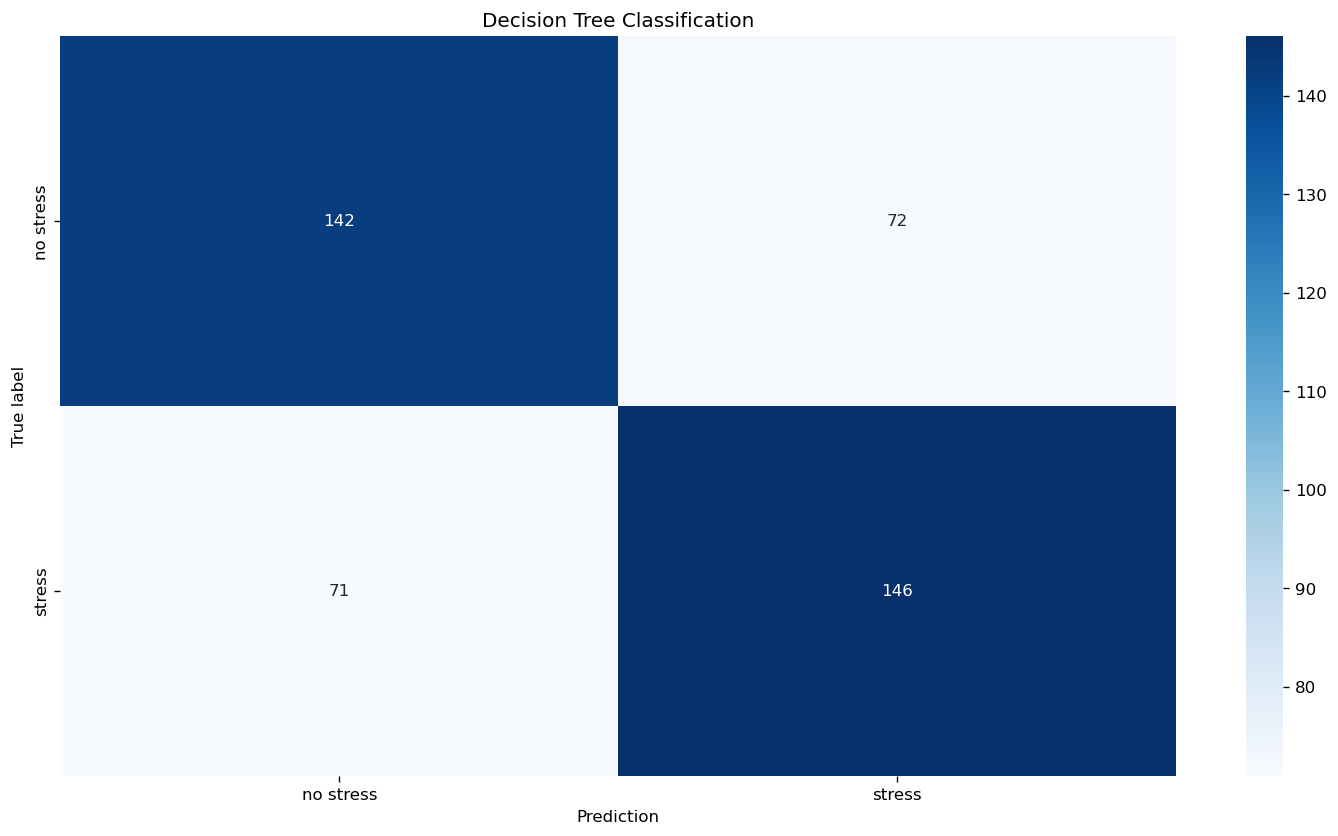

In [203]:
plot_confusion_matrix(tclf,X_test_dt,y_test_dt,"Decision Tree Classification",is_ml=True)

In [204]:
from sklearn.tree import DecisionTreeClassifier

# Crear un modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Entrenar el modelo de árbol de decisión con los datos de entrenamiento
tree.fit(X_train_dt, y_train_dt)

# Obtener la importancia de las variables en el modelo
importances = tree.feature_importances_

# Imprimir las variables más importantes
for i in range(len(importances)):
    if importances[i] > 0.1:
        print("Variable {} es importante con importancia relativa {}".format(i, importances[i]))

Variable 0 es importante con importancia relativa 0.5815231289679845
Variable 1 es importante con importancia relativa 0.41847687103201536


# RandomForestClassifier

In [205]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train_dt,y_train_dt)

y_pred_RF = RF.predict(X_test_dt)


In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

RF_accuracy = accuracy_score(y_test_dt, y_pred_RF)
RF_precision = precision_score(y_test_dt, y_pred_RF, average='weighted')
RF_recall = recall_score(y_test_dt, y_pred_RF, average='weighted')
RF_f1 = f1_score(y_test_dt, y_pred_RF, average='weighted')

# Displays the results
print("Accuracy: {:.3f}".format(RF_accuracy))
print("Precision: {:.3f}".format(RF_precision))
print("Recall: {:.3f}".format(RF_recall))
print("F1-score: {:.3f}".format(RF_f1))

Accuracy: 0.715
Precision: 0.715
Recall: 0.715
F1-score: 0.715


In [207]:
from sklearn.metrics import classification_report
cm=classification_report(y_test_dt, y_pred_RF)
print(cm)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       214
           1       0.71      0.73      0.72       217

    accuracy                           0.71       431
   macro avg       0.71      0.71      0.71       431
weighted avg       0.71      0.71      0.71       431



model accuracy on test set is: 71.46%


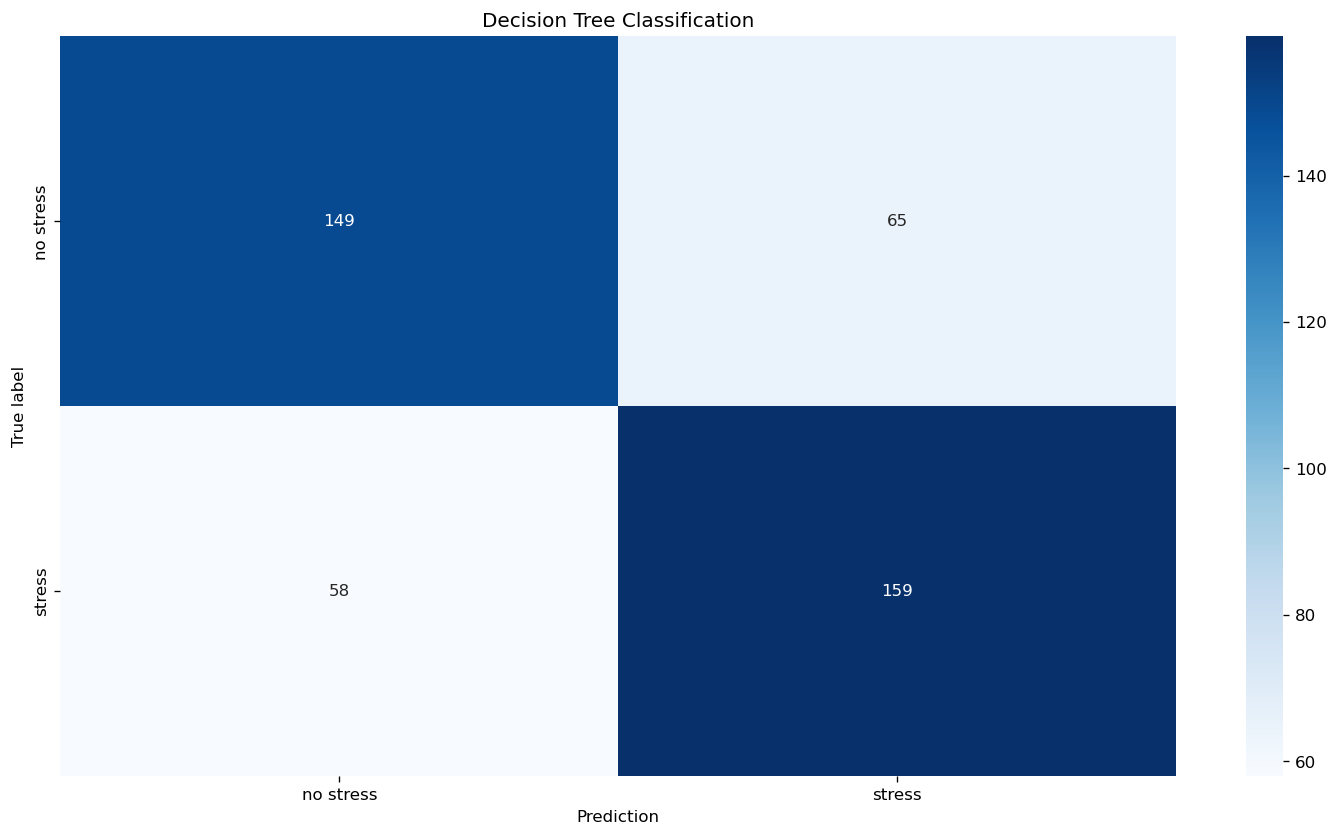

In [208]:
plot_confusion_matrix(RF,X_test_dt,y_test_dt,"Decision Tree Classification",is_ml=True)

# KNeighborsClassifier

In [209]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un modelo KNN
KNN = KNeighborsClassifier(n_neighbors=21)

# Entrenar el modelo KNN con los datos de entrenamiento
KNN.fit(X_train_dt, y_train_dt)

y_pred_KNN = KNN.predict(X_test_dt)

In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

KNN_accuracy = accuracy_score(y_test_dt, y_pred_KNN)
KNN_precision = precision_score(y_test_dt, y_pred_KNN, average='weighted')
KNN_recall = recall_score(y_test_dt, y_pred_KNN, average='weighted')
KNN_f1 = f1_score(y_test_dt, y_pred_KNN, average='weighted')

# Displays the results
print("Accuracy: {:.3f}".format(KNN_accuracy))
print("Precision: {:.3f}".format(KNN_precision))
print("Recall: {:.3f}".format(KNN_recall))
print("F1-score: {:.3f}".format(KNN_f1))

Accuracy: 0.715
Precision: 0.722
Recall: 0.715
F1-score: 0.712


In [211]:
from sklearn.metrics import classification_report
cm=classification_report(y_test_dt, y_pred_KNN)
print(cm)

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       214
           1       0.68      0.81      0.74       217

    accuracy                           0.71       431
   macro avg       0.72      0.71      0.71       431
weighted avg       0.72      0.71      0.71       431



model accuracy on test set is: 71.46%


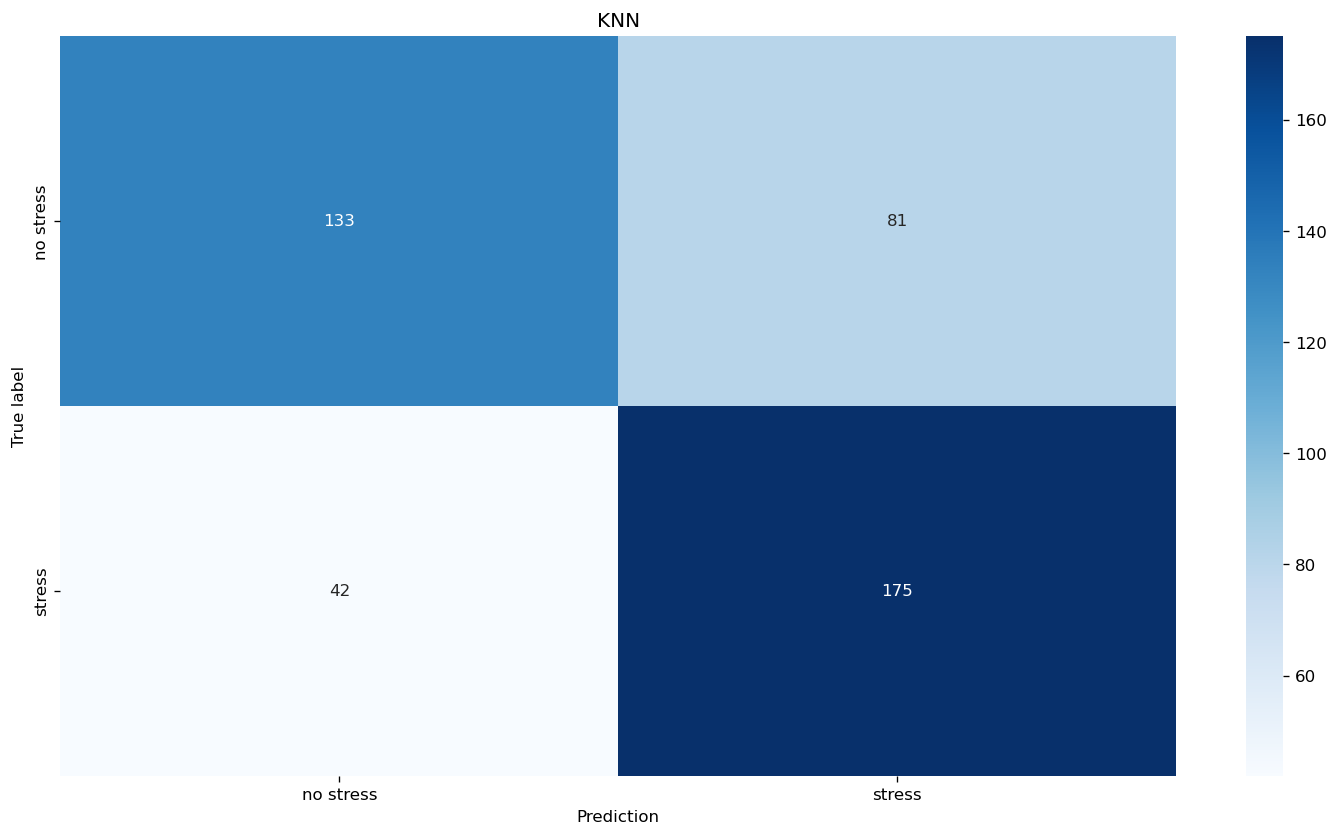

In [212]:
plot_confusion_matrix(KNN,X_test_dt,y_test_dt,"KNN",is_ml=True)

# Support Vector Machine

In [213]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_dt, y_train_dt)

y_pred_svm = svm.predict(X_test_dt)

In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_accuracy = accuracy_score(y_test_dt, y_pred_svm)
svm_precision = precision_score(y_test_dt, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test_dt, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test_dt, y_pred_svm, average='weighted')

# Displays the results
print("Accuracy: {:.3f}".format(svm_accuracy))
print("Precision: {:.3f}".format(svm_precision))
print("Recall: {:.3f}".format(svm_recall))
print("F1-score: {:.3f}".format(svm_f1))

Accuracy: 0.622
Precision: 0.622
Recall: 0.622
F1-score: 0.621


model accuracy on test set is: 62.18%


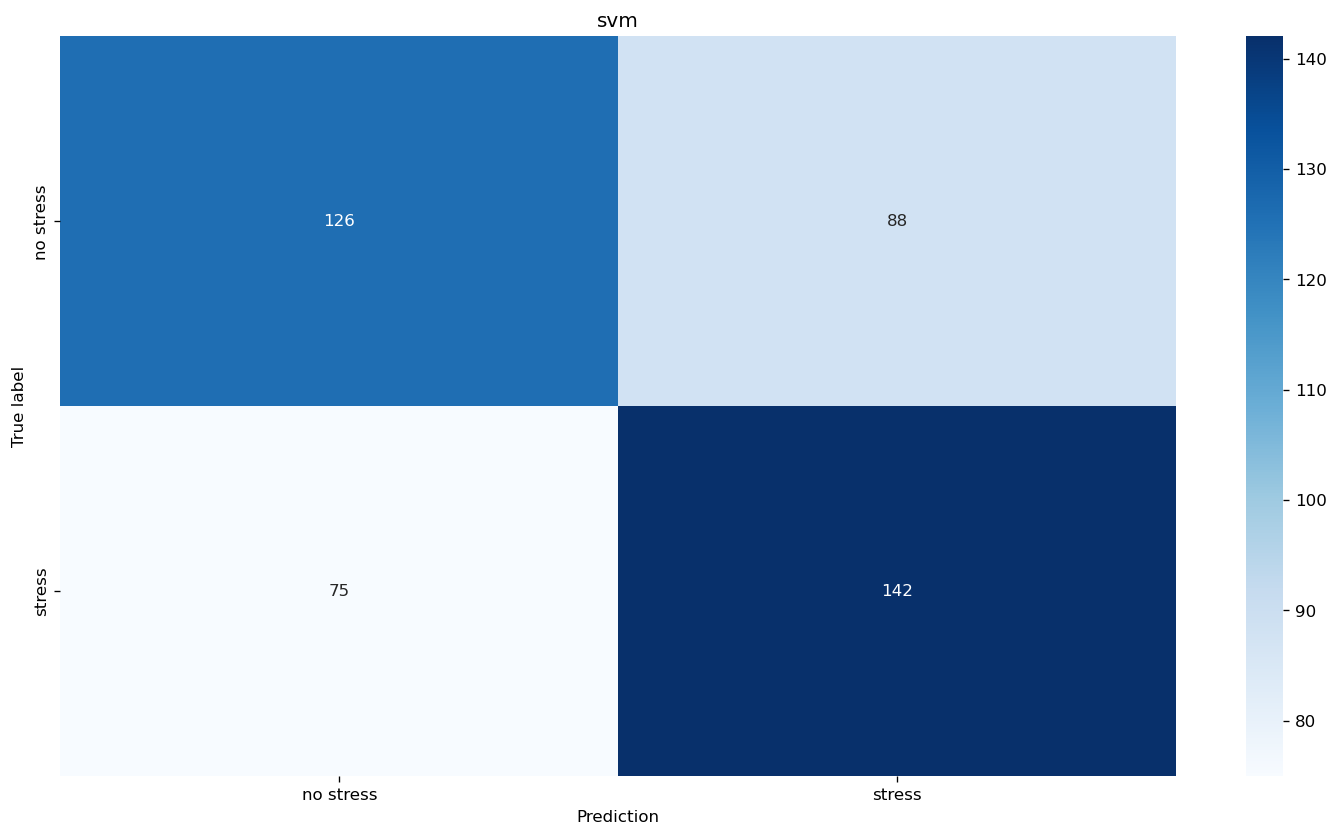

In [215]:
plot_confusion_matrix(svm,X_test_dt,y_test_dt,"svm",is_ml=True)

# Comparison 

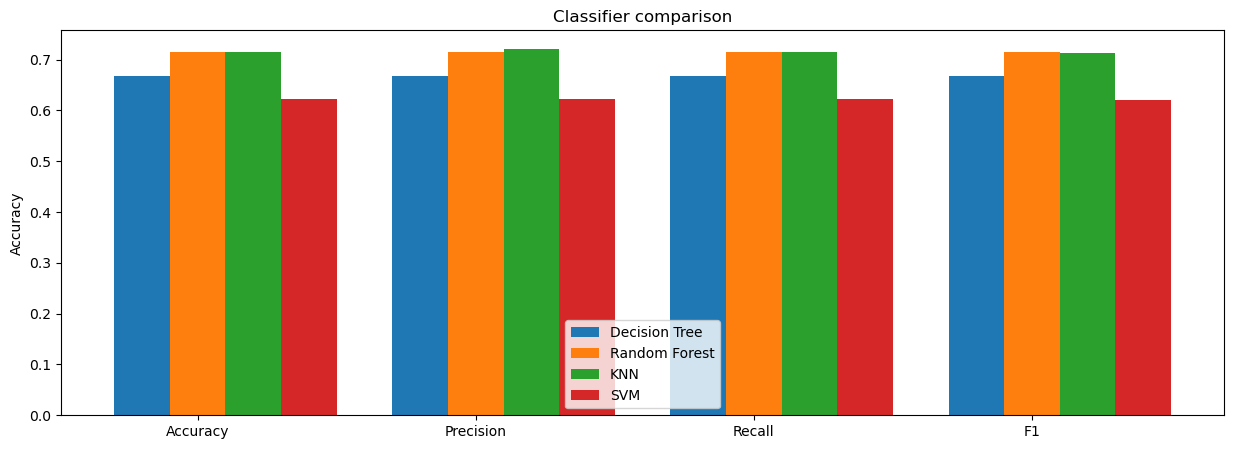

In [221]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1']

# Datos para cada clasificador
tclf_scores = [tclf_accuracy, tclf_precision, tclf_recall, tclf_f1]
RF_scores = [RF_accuracy, RF_precision, RF_recall, RF_f1]
KNN_scores = [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

# Configuración del gráfico
x = range(len(labels))
width = 0.2

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(15, 5))

# Crear las barras
ax.bar(x, tclf_scores, width, label='Decision Tree')
ax.bar([val + width for val in x], RF_scores, width, label='Random Forest')
ax.bar([val + width*2 for val in x], KNN_scores, width, label='KNN')
ax.bar([val + width*3 for val in x], svm_scores, width, label='SVM')

# Configurar los ejes
ax.set_ylabel('Accuracy')
ax.set_title('Classifier comparison')
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(labels)
ax.legend(loc='lower center') 

# Mostrar el gráfico
plt.show()

In [222]:

# Crear un diccionario con los datos
data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [tclf_accuracy, RF_accuracy, KNN_accuracy, svm_accuracy],
    'Precision': [tclf_precision, RF_precision, KNN_precision, svm_precision],
    'Recall': [tclf_recall, RF_recall, KNN_recall, svm_recall],
    'F1': [tclf_f1, RF_f1, KNN_f1, svm_f1]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

      Classifier  Accuracy  Precision    Recall        F1
0  Decision Tree  0.668213   0.668206  0.668213  0.668206
1  Random Forest  0.714617   0.714779  0.714617  0.714510
2            KNN  0.714617   0.721531  0.714617  0.712077
3            SVM  0.621810   0.622096  0.621810  0.621386


In [267]:
df_test = pd.DataFrame({'HRV': X_test_dt[:, 0], 'SCL': X_test_dt[:, 1]})


array([[0.01684848, 0.07739669],
       [0.00998282, 0.1620777 ],
       [0.00929166, 0.09452683],
       [0.01063625, 0.092383  ],
       [0.00745013, 0.06207741],
       [0.00729191, 0.0914396 ],
       [0.00751844, 0.07383338],
       [0.00706551, 0.05888796],
       [0.00709936, 0.08055109],
       [0.00405462, 0.15925918],
       [0.00422814, 0.15746001],
       [0.00438895, 0.41870559],
       [0.00492361, 0.1084938 ],
       [0.00573573, 0.0994658 ],
       [0.00481053, 0.10960953],
       [0.01057328, 0.06270244],
       [0.01230337, 0.35202509],
       [0.01226674, 0.0835244 ],
       [0.00868097, 0.11247769],
       [0.00921287, 0.11802418],
       [0.02863019, 0.06674767],
       [0.03524058, 0.06181162],
       [0.02112635, 0.07607359],
       [0.0216451 , 0.0596123 ],
       [0.01952402, 0.06639134],
       [0.01879803, 0.06598828],
       [0.01836448, 0.08432468],
       [0.02009441, 0.06737563],
       [0.01856412, 0.06333624],
       [0.01855812, 0.07906735],
       [0.